In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original = r'Original.png'
brain = r'Brain.png'

# 1)

![alt text](Original.png)
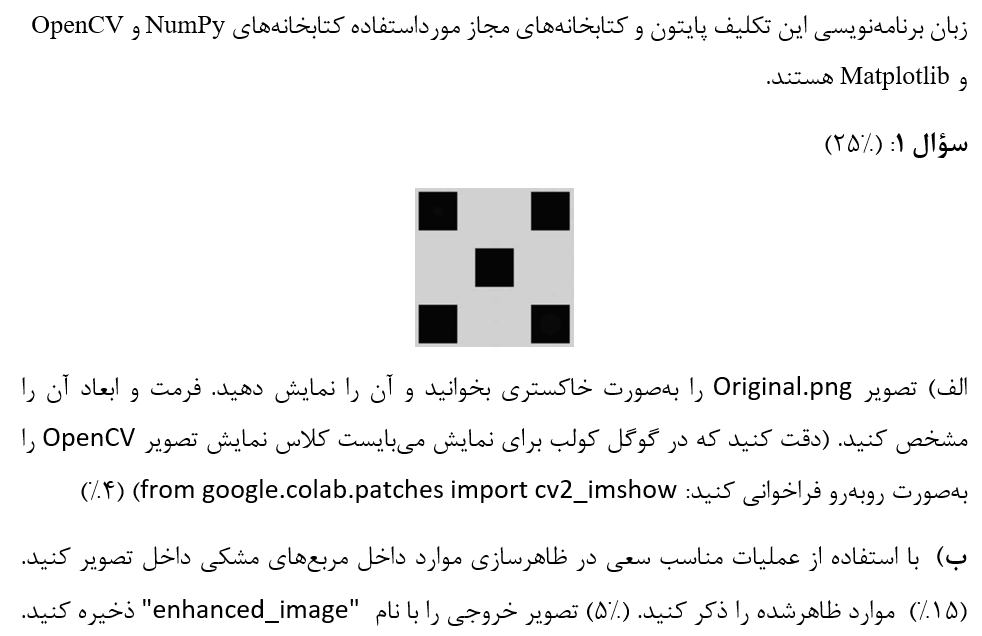

### A 

In [3]:
image = cv2.imread(original, cv2.IMREAD_GRAYSCALE)

height, width = image.shape
print(f"Dimensions: {width} x {height}")
print("Format: Grayscale")

cv2.imshow("Grayscale Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Dimensions: 244 x 244
Format: Grayscale


### B

In [4]:
enhanced_img = np.log1p(np.array(image, dtype=np.float32))  # Log transformation
enhanced_img = np.uint8(enhanced_img / np.max(enhanced_img) * 255)  # Normalize to 0-255

cv2.imshow('Enhanced Image', enhanced_img)
cv2.imwrite('enhanced_image.png', enhanced_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Illustration of the enhanced image and its components**

![alt text](enhanced_image.png)

I first convert the image (which is typically in uint8 format with values from 0 to 255) into a floating-point representation (float32). *This is necessary for performing mathematical operations like logarithms.* The code also adds 1 to the intensity of each pixel to avoid obtaining infinite amount when it encounters a pixel that is purely black. Then the derived intensities are scaled between 0-255.

- The log transformation enhances the contrast in darker regions (black or near-black areas), while reducing the effect of lighter regions. This makes the darker parts of the image more visible and enhances the details in dark or shadowy areas. The opposite can be done if we apply nth power as the lighter parts will dramatically become lighter. If an image is predominantly bright, the differences in the darker regions may be less noticeable. The log transformation compresses the bright regions (high-intensity values) and spreads out the darker regions, *making it easier to distinguish details in low-intensity areas.*

# 2

![image.png](Brain.png)
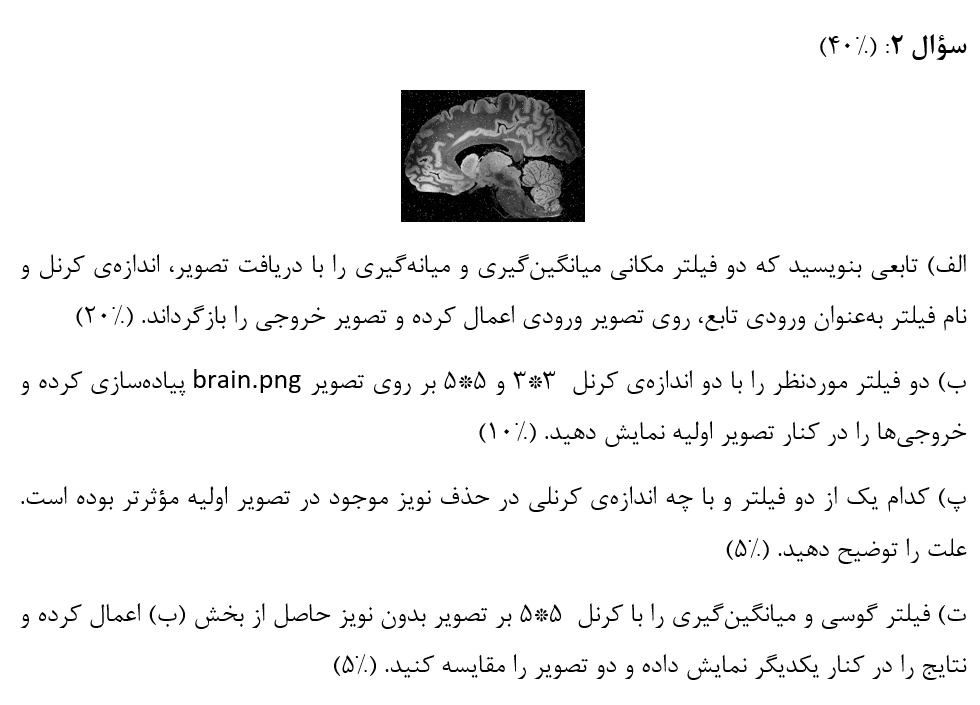

### A

In [5]:
def apply_filters(image, kernel_size, filter):
    if filter == 'mean':
        mean_filtered = cv2.blur(image, (kernel_size, kernel_size))       # Mean filter
        return mean_filtered
    elif filter == 'median':
        median_filtered = cv2.medianBlur(image, kernel_size)              # Median filter
        return median_filtered


### B

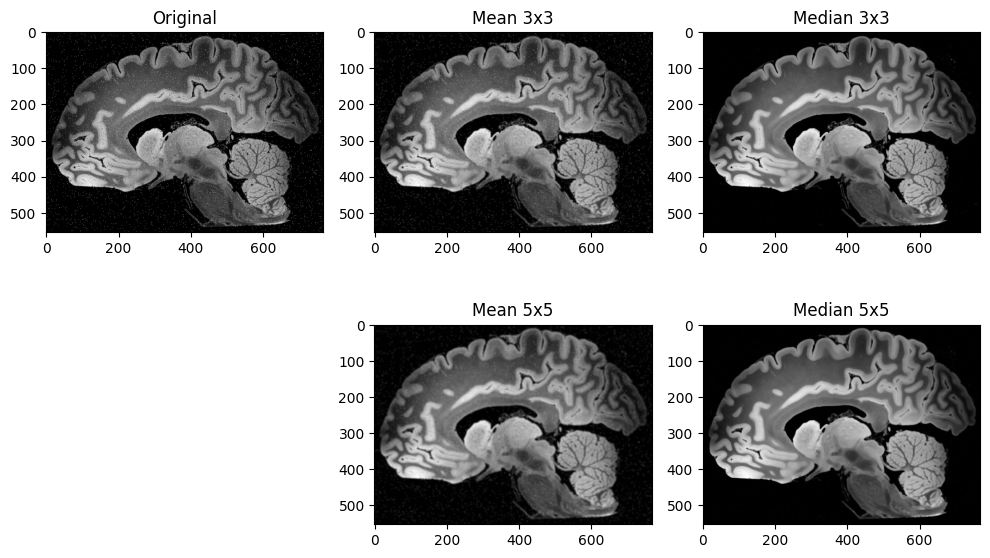

In [13]:
img = cv2.imread('brain.png', cv2.IMREAD_GRAYSCALE)

mean3 = apply_filters(img, 3, filter='mean')
mean5 = apply_filters(img, 5, filter='mean')
median3 = apply_filters(img, 3, filter='median')
median5 = apply_filters(img, 5, filter='median')

plt.figure(figsize=(10,6))
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(2,3,2); plt.imshow(mean3, cmap='gray'); plt.title('Mean 3x3')
plt.subplot(2,3,3); plt.imshow(median3, cmap='gray'); plt.title('Median 3x3')
plt.subplot(2,3,5); plt.imshow(mean5, cmap='gray'); plt.title('Mean 5x5')
plt.subplot(2,3,6); plt.imshow(median5, cmap='gray'); plt.title('Median 5x5')
plt.tight_layout()
plt.show()

### C

Theoretically, median filter results in better results if we have salt and pepper noise as it finds the median of the pixels near the main one instead of using averaging. Therefore, in case of few salt/pepper existence, using median wouldn't factor in these noises. However, if there are multiple salts/peppers next to each other, median filters wouldn't be able to omit the noise as they for a pulse-like edge in their intensity histogram. Median fileter is most capable of detecting pulse noises.

Using higher dimensions of kernels means there will be a stricter criterion against noise. Therefore, a blurred image would be derived.

### D

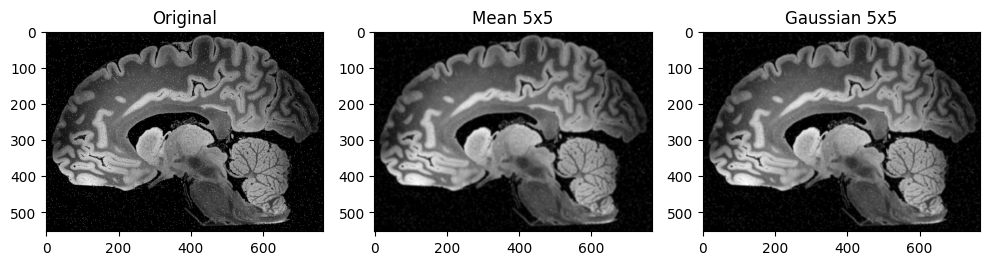

In [14]:
gaussian = cv2.GaussianBlur(mean3, (5,5), 0)
mean = apply_filters(mean3, 5, filter='mean')

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1, 3, 2); plt.imshow(mean, cmap='gray'); plt.title('Mean 5x5')
plt.subplot(1, 3, 3); plt.imshow(gaussian, cmap='gray'); plt.title('Gaussian 5x5') # More Blurred
plt.tight_layout()
plt.show()